# IMPORT ALL LIBRARIES

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import json
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#Read the Dataframe from clean dataset, all JSON Columns are flattened

train_clean=pd.read_csv('train_single_dataframe.csv')

In [ ]:
train_clean.info()

In [12]:
train_clean.shape

(903653, 56)

# Missing values Handling

In [13]:
#Handle Missing values

features_with_na = [features for features in train_clean.columns if train_clean[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(train_clean[feature].isnull().mean(),2), '% missing values')


    
# OBESERVATION1: Target variable has 0.99% missing values. 
# OBESERVATION2: Many features have more than 90% missing, we can drop these columns during Data processing 

totals.pageviews 0.0 % missing values
totals.bounces 0.5 % missing values
totals.newVisits 0.22 % missing values
totals.transactionRevenue 0.99 % missing values
trafficSource.keyword 0.56 % missing values
trafficSource.isTrueDirect 0.7 % missing values
trafficSource.referralPath 0.63 % missing values
trafficSource.adwordsClickInfo.page 0.98 % missing values
trafficSource.adwordsClickInfo.slot 0.98 % missing values
trafficSource.adwordsClickInfo.gclId 0.98 % missing values
trafficSource.adwordsClickInfo.adNetworkType 0.98 % missing values
trafficSource.adwordsClickInfo.isVideoAd 0.98 % missing values
trafficSource.adContent 0.99 % missing values
trafficSource.campaignCode 1.0 % missing values


In [14]:
# Numerical values
num_features=[feature for feature in train_clean.columns if train_clean[feature].dtypes in  ('float64','int64') ]
print ("Number of Numerical features:", len(num_features))

train_clean[num_features]


Number of Numerical features: 12


,Unnamed: 0,date,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.adwordsClickInfo.page
0,0,20160902,1472830385,1,1472830385,1,1,1.0,1.0,1.0,NaN,NaN
1,1,20160902,1472880147,1,1472880147,1,1,1.0,1.0,1.0,NaN,NaN
2,2,20160902,1472865386,1,1472865386,1,1,1.0,1.0,1.0,NaN,NaN
3,3,20160902,1472881213,1,1472881213,1,1,1.0,1.0,1.0,NaN,NaN
4,4,20160902,1472822600,2,1472822600,1,1,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
903648,903648,20170104,1483554750,1,1483554750,1,17,15.0,NaN,1.0,NaN,NaN
903649,903649,20170104,1483543798,1,1483543798,1,18,13.0,NaN,1.0,NaN,NaN
903650,903650,20170104,1483526434,1,1483526434,1,24,21.0,NaN,1.0,NaN,NaN
903651,903651,20170104,1483592857,1,1483592864,1,24,22.0,NaN,1.0,NaN,NaN


In [69]:
#Datetime variables

#Convert date column from INT to Date format.
#Derive Year and Month fields from DateTime field

train_clean['date']=pd.to_datetime(train_clean['date'],format='%Y%m%d')
train_clean['year'] = train_clean['date'].dt.year
train_clean['month'] = pd.to_datetime(train_clean['date']).dt.strftime('%Y-%m')


Text(0, 0.5, 'Revenue')

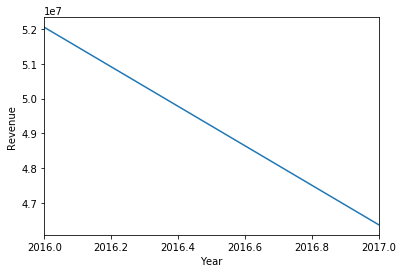

In [67]:
#Analyse the Year with Revnue. We can see it linearly decreased over a year.

train_clean.groupby('year')['totals.transactionRevenue'].median().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

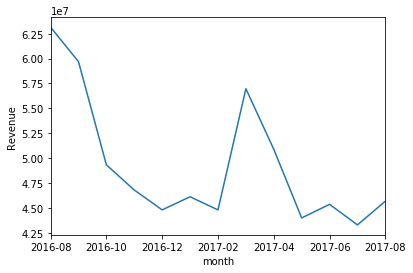

In [68]:
#Analyse the Month with Revnue.
#The Revenue is at its peak during Aug 2016 and Apr 2017.
#Revenues during holiday seasons hasn't increased.

train_clean.groupby('month')['totals.transactionRevenue'].median().plot()
plt.xlabel('month')
plt.ylabel('Revenue')

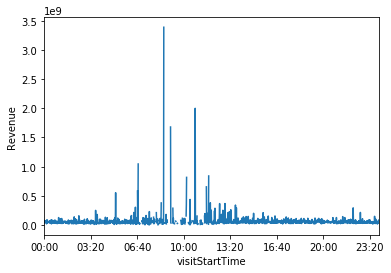

In [109]:
#Analyse the Vist Start Time with Revnue.


train_clean['visitStartTime1'] = pd.to_datetime(train_clean['visitStartTime'],unit='s')
train_clean['Time']=train_clean['visitStartTime1'].dt.strftime('%H:%M')

train_clean.groupby('Time')['totals.transactionRevenue'].median().plot()

plt.xlabel('visitStartTime')
plt.ylabel('Revenue')
plt.show()

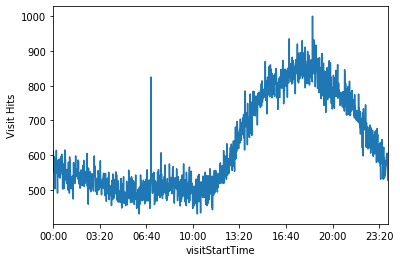

In [108]:
#Analyse the Vist Start Time with Revnue.


train_clean.groupby('Time')['totals.visits'].count().plot()

plt.xlabel('visitStartTime')
plt.ylabel('Visit Hits')
plt.show()



# We are getting more hits to website during evening hours compared to morning hours


In [21]:
train_clean.describe()

,Unnamed: 0,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.adwordsClickInfo.page,year
count,903653.000000,9.036530e+05,903653.000000,9.036530e+05,903653.0,903653.000000,903553.000000,450630.0,703060.0,1.151500e+04,21460.000000,903653.000000
mean,451826.000000,1.485007e+09,2.264897,1.485007e+09,1.0,4.596538,3.849764,1.0,1.0,1.337448e+08,1.008108,2016.517079
std,260862.295738,9.022124e+06,9.283735,9.022124e+06,0.0,9.641437,7.025274,0.0,0.0,4.482852e+08,0.173584,0.499708
min,0.000000,1.470035e+09,1.000000,1.470035e+09,1.0,1.000000,1.000000,1.0,1.0,1.000000e+04,1.000000,2016.000000
25%,225913.000000,1.477561e+09,1.000000,1.477561e+09,1.0,1.000000,1.000000,1.0,1.0,2.493000e+07,1.000000,2016.000000
50%,451826.000000,1.483949e+09,1.000000,1.483949e+09,1.0,2.000000,1.000000,1.0,1.0,4.945000e+07,1.000000,2017.000000
75%,677739.000000,1.492759e+09,1.000000,1.492759e+09,1.0,4.000000,4.000000,1.0,1.0,1.076550e+08,1.000000,2017.000000
max,903652.000000,1.501657e+09,395.000000,1.501657e+09,1.0,500.000000,469.000000,1.0,1.0,2.312950e+10,14.000000,2017.000000


In [70]:
#Discrete and Continous variable

discrete_features=[feature for feature in num_features if len(train_clean[feature].unique()) <25 and feature not in ['year']+['Unnamed: 0']]
discrete_features

['totals.visits',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.adwordsClickInfo.page',
 'trafficSource.campaignCode']

Plotting Discrete features against Revenue

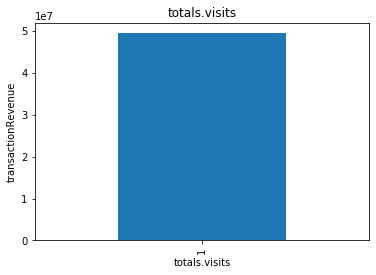

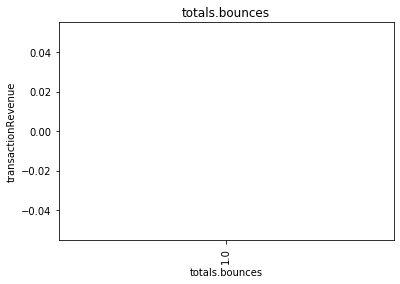

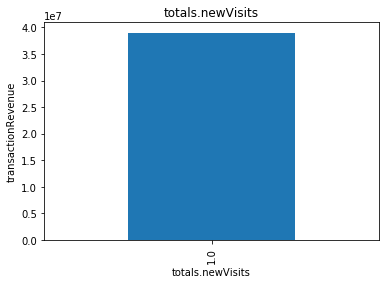

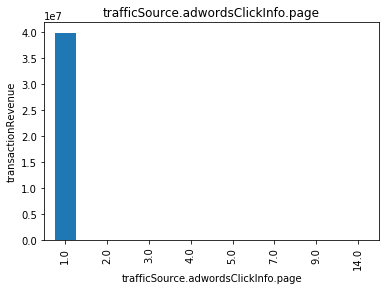

In [24]:
for feature in discrete_features:
    data = train_clean.copy()
    data.groupby(feature)['totals.transactionRevenue'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('transactionRevenue')
    plt.title(feature)
    plt.show()

In [25]:
## Continous features

continous_feature=[feature for feature in num_features if feature not in discrete_features and feature not in ['year']+['Unnamed: 0']]
continous_feature

['date',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'totals.hits',
 'totals.pageviews',
 'totals.transactionRevenue']

In [32]:
# Numerical values
num_features=[feature for feature in train_not_null.columns if train_not_null[feature].dtypes in  ('float64','int64') ]
print ("Number of Numerical features:", len(num_features))

train_not_null[num_features]


Number of Numerical features: 14


,Unnamed: 0,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.adwordsClickInfo.page,trafficSource.campaignCode
0,752,20160902,6.194190e+18,1472843572,1,1472843572,1,11,11,NaN,1.0,37860000,NaN,NaN
1,753,20160902,5.327170e+18,1472844906,3,1472844906,1,11,10,NaN,NaN,306670000,NaN,NaN
2,799,20160902,8.885050e+18,1472827393,7,1472827393,1,13,11,NaN,NaN,68030000,NaN,NaN
3,802,20160902,1.854680e+17,1472846398,6,1472846398,1,13,12,NaN,NaN,26250000,NaN,NaN
4,859,20160902,3.244890e+18,1472824817,4,1472824817,1,17,14,NaN,NaN,574150000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,903302,20170104,6.849600e+18,1483566314,10,1483566314,1,61,48,NaN,NaN,335260000,NaN,NaN
11511,903305,20170104,2.119870e+17,1483568879,2,1483568879,1,66,30,NaN,NaN,599950000,NaN,NaN
11512,903314,20170104,9.981560e+18,1483576938,1,1483576938,1,122,90,NaN,1.0,30750000,NaN,NaN
11513,903315,20170104,9.631260e+17,1483552674,3,1483552674,1,130,90,NaN,NaN,69390000,NaN,NaN


In [124]:
#Categorical varibles

categorical_features=[features for features in train_clean.columns if train_clean[features].dtypes=='O' and features not in ('sessionId','geoNetwork.networkDomain','trafficSource.adwordsClickInfo.gclId','geoNetwork.city','fullVisitorId','trafficSource.adwordsClickInfo.page','trafficSource.adwordsClickInfo.slot','trafficSource.adwordsClickInfo.gclId','trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.isVideoAd','trafficSource.adContent','trafficSource.campaignCode','month','Time')]
categorical_features

['channelGrouping',
 'socialEngagementType',
 'device.browser',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystem',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'trafficSource.isTrueDirect',
 'trafficSource.referralPath']

In [125]:
train_clean[categorical_features].head()

,channelGrouping,socialEngagementType,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,...,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath
0,Organic Search,Not Socially Engaged,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN
1,Organic Search,Not Socially Engaged,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN
2,Organic Search,Not Socially Engaged,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN
3,Organic Search,Not Socially Engaged,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,google + online,not available in demo dataset,NaN,NaN
4,Organic Search,Not Socially Engaged,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),not available in demo dataset,True,NaN


In [126]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_clean[feature].unique())))

The feature is channelGrouping and number of categories are 8
The feature is socialEngagementType and number of categories are 1
The feature is device.browser and number of categories are 54
The feature is device.browserVersion and number of categories are 1
The feature is device.browserSize and number of categories are 1
The feature is device.operatingSystem and number of categories are 20
The feature is device.operatingSystemVersion and number of categories are 1
The feature is device.mobileDeviceBranding and number of categories are 1
The feature is device.mobileDeviceModel and number of categories are 1
The feature is device.mobileInputSelector and number of categories are 1
The feature is device.mobileDeviceInfo and number of categories are 1
The feature is device.mobileDeviceMarketingName and number of categories are 1
The feature is device.flashVersion and number of categories are 1
The feature is device.language and number of categories are 1
The feature is device.screenColors 

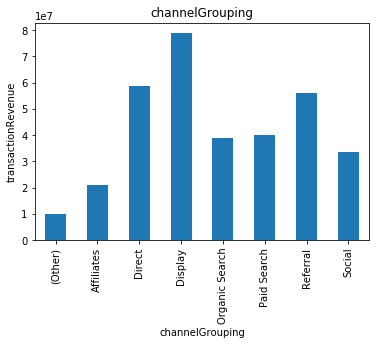

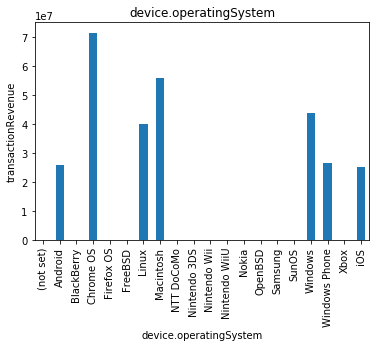

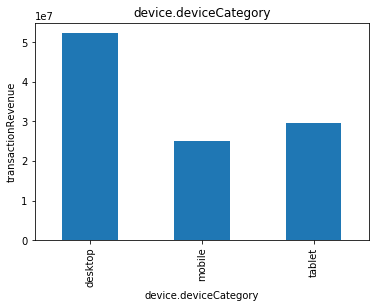

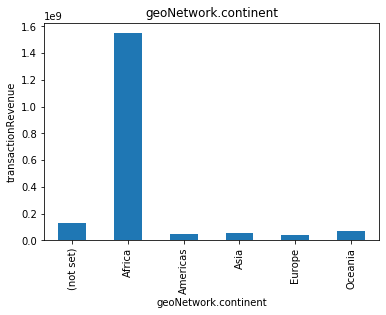

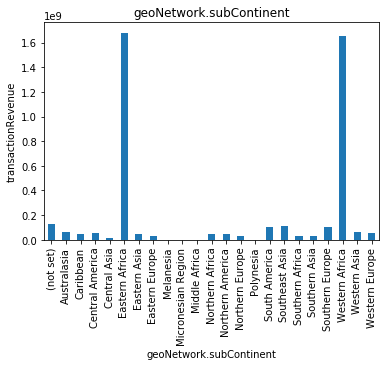

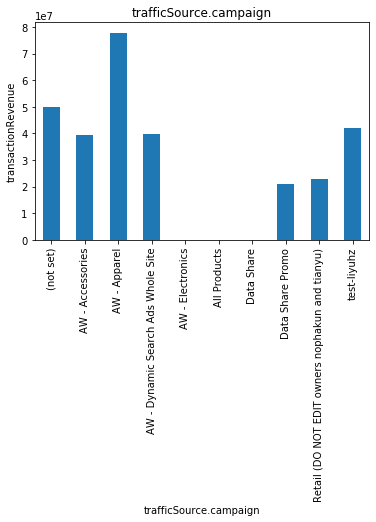

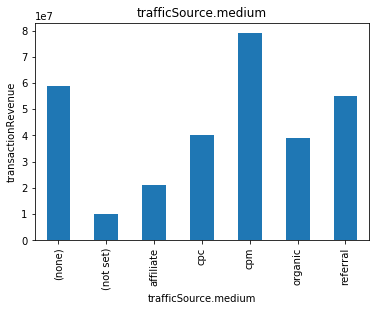

In [129]:
#Relationship betweem categorical features and Revenue
categorical_features=['channelGrouping','device.operatingSystem','device.deviceCategory', 'geoNetwork.continent', 'geoNetwork.subContinent', 'trafficSource.campaign', 'trafficSource.medium']

for feature in categorical_features:
    data=train_clean.copy()
    data.groupby(feature)['totals.transactionRevenue'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('transactionRevenue')
    plt.title(feature)
    plt.show()

# Finding/Insights from EDA task

In [52]:
# OBESERVATION1: Target variable (Transaction Revenue) has 0.99% missing values. 
# OBESERVATION2: Total 9 features have more than 90% missing, we can drop these columns during Data processing.
# OBESERVATION3: Transaction Revenue vs Year plot is linearly decreasing.
# OBESERVATION4: Transaction Revenue vs Month plot gives below findings:
                    #a. Revenue is at its peak during Aug 2016 and Apr 2017.
                    #b. Revenues during holiday seasons hasn't increased.

# OBESERVATION5: We are getting more hits to website during evening hours compared to morning hours. 
                #However, more revenue generated during Morning hours.

# OBESERVATION6: Highest revenue were generated by Display Ads by plotting Revenue against Channel Grouping.
# OBESERVATION7: Highest revenue were generated by Desktops by plotting Revenue against Device Category.
# OBESERVATION7: Africa stands Highest in producing revenue by plotting Revenue against Continents/Subcontinets.




